## Observations and Insights 

In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)





# Combine the data into a single dataset

# Display the data table for preview


In [69]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [70]:
mouse_metadata.shape

(249, 5)

In [71]:
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [72]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [73]:
study_results.shape

(1893, 4)

In [74]:
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [75]:
# Rename (space)filled column names
# https://www.youtube.com/watch?v=0uBirYFhizE


mouse_metadata.rename(columns = {"Mouse ID":"Mouse_ID", "Drug Regimen":"Drug_Regimen", "Weight (g)":"Weight_g"}, inplace = True)

study_results.rename(columns = {"Mouse ID":"Mouse_ID", "Tumor Volume (mm3)":"Tumor_Volume_mm3", "Metastatic Sites":"Metastatic_Sites"}, inplace = True)

In [76]:

# Combine the data into a single dataset

mouse_study = pd.merge(mouse_metadata, study_results, on = "Mouse_ID")


mouse_study




,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [77]:
print(mouse_metadata.shape)
print(study_results.shape)
print(mouse_study.shape)


(249, 5)
(1893, 4)
(1893, 8)


In [78]:


# Optional: Get all the data for the duplicate mouse ID. 
# https://www.youtube.com/watch?v=ht5buXUMqkQ&t=145s


mouse_study.duplicated().sum()
mouse_study.loc[mouse_study.duplicated(keep=False),:]








,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic_Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [79]:
# Checking the number of mice.
mouse_len = len(mouse_study["Mouse_ID"].unique())
mouse_len



pd.DataFrame({"Total Mice":[mouse_len]})

,Total Mice
0,249


In [80]:

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study.drop_duplicates(subset=["Mouse_ID", "Timepoint"])
clean_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [81]:
# Checking the number of mice in the clean DataFrame.
mouse_len = len(clean_df["Mouse_ID"].unique())
mouse_len



pd.DataFrame({"Total Mice":[mouse_len]})

,Total Mice
0,249


## Summary Statistics

In [82]:
# View Clean Data 
clean_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [83]:
# View Tumor_Volume_mm3

clean_df["Tumor_Volume_mm3"]

0       45.000000
1       38.825898
2       35.014271
3       34.223992
4       32.997729
          ...    
1888    63.145652
1889    65.841013
1890    69.176246
1891    70.314904
1892    73.867845
Name: Tumor_Volume_mm3, Length: 1888, dtype: float64

In [84]:
# Generate a summary statistics table of 
# mean, 
# median, 
# variance, 
# standard deviation, 
# and SEM 
# of the tumor volume for each regimen

# This method is the most straighforward, 
# creating multiple series and putting them all together at the end.

# https://www.youtube.com/watch?v=txMdrV1Ut64

# Step 1 Create Groupby ("Drug_Regimen")
regimen_type = clean_df.groupby("Drug_Regimen")

# Step 2 Use Aggregate Functions using grouby from step 1 to get xxx for Tumor Volume

regimen_type["Tumor_Volume_mm3"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [104]:
# Generate a summary statistics table of 
# mean, 
# median, 
# variance, 
# standard deviation, 
# and SEM 
# of the tumor volume for each regimen

# This method produces everything in a single groupby function


# Step 1 create 'mean_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].mean
mean_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].mean()

# Step 2 create 'median_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].median
median_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].median()

# Step 3 create 'var_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].var
var_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].var()

# Step 4 create 'STD_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].STD
std_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].std()

# Step 5 create 'sem_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].SEM
sem_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].sem()

summary_data = pd.DataFrame({"Tumor_Volume_Mean":mean_regimen, "Tumor_Volume_Median":median_regimen, "Tumor_Volume_Var":var_regimen, "Tumor_Volume_std":std_regimen, "Tumor_Volume_sem":sem_regimen})

summary_data




,Tumor_Volume_Mean,Tumor_Volume_Median,Tumor_Volume_Var,Tumor_Volume_std,Tumor_Volume_sem
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

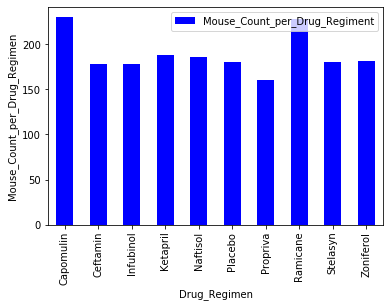

<Figure size 432x288 with 0 Axes>

In [86]:
# Generate a bar plot showing the total number of mice for each 
# treatment throughout the course of the study using pandas.

# Step 1 Groupby total number of mice per treatment
mice_count_treatment = mouse_study.groupby("Drug_Regimen")["Mouse_ID"].count()
mice_count_treatment

# Step 2 Create a data frame 

new_mice_df = pd.DataFrame({"Mouse_Count_per_Drug_Regiment":mice_count_treatment})
new_mice_df

# Step 3 Apply.plot.bar()
#new_mice_df.plot.bar(y = "Mouse_Count per Drug_Regiment")

# or 

# Step 3 (alt. way) Create a bar chart based of the group series
mice_chart = new_mice_df.plot(kind = 'bar', color ='b', align = "center")

# Step 3 (alt. way) set xlabel and ylabel using class methods
mice_chart.set_xlabel("Drug_Regimen")
mice_chart.set_ylabel("Mouse_Count_per_Drug_Regimen")

plt.show()
plt.tight_layout()


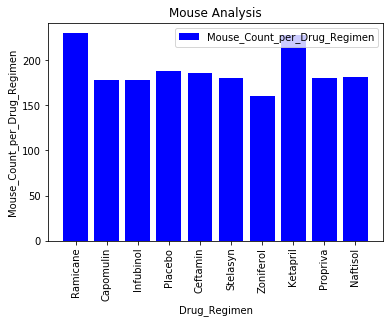

<Figure size 432x288 with 0 Axes>

In [87]:

# Generate a bar plot showing the total number of mice 
# for each treatment throughout the course of the study 
# using pyplot.

# Step 1 Groupby Drug Reg and Mouse ID to get count of mice per drug for the Y axis
mice_count_treatment = mouse_study.groupby("Drug_Regimen")["Mouse_ID"].count()
mice_count_treatment

# Step 2 get list of Drug Reg
drug_list = clean_df["Drug_Regimen"].unique()
drug_list


# Step 3 get an array of drug regimens for x axis
x_axis = np.arange(len(drug_list))
x_axis

# Step 4 Tell matplotlib to make bar chart
plt.bar(x_axis, mice_count_treatment, color = 'b', align = "center", label = "Mouse_Count_per_Drug_Regimen")

# Step 5 tell matplotlib where we want to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks( tick_locations, ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'], rotation=90)

# Step 6 Set the x limits of the xlimits in current chart
#plt.xlim(-0.70, 9.75)
#plt.ylim(0, 250)

# Step 7 set the x and y axis
plt.title ("Mouse Analysis")
plt.xlabel("Drug_Regimen")
plt.ylabel("Mouse_Count_per_Drug_Regimen")
plt.legend()


plt.show()
plt.tight_layout()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3cbbe49d0>],
      dtype=object)

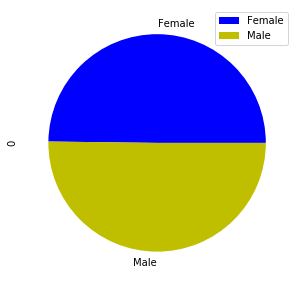

In [88]:
# Generate a pie plot showing the distribution 
# of female versus male mice using pandas


# Calculate the unique number of users
total_unique = len(clean_df["Mouse_ID"].unique())

# Extract the username and gender column
obtain_colum = clean_df[["Mouse_ID", "Sex"]]

# dropping duplicate values for the username category. The parameter keep = "first" IS KEY HERE
drop_dup = clean_df.drop_duplicates(subset = ["Mouse_ID"], keep="first",inplace=False)

# Give a count per gender
count_gender = drop_dup.groupby(["Sex"]).count()

# Create a summary dataframe with a single column containing the results from the previous calculation
gender_summary = pd.DataFrame({"Count": count_gender ["Mouse_ID"]}, index = count_gender.index)
gender_summary


df = pd.DataFrame([124, 125], index = ["Female", "Male"])
df.plot(kind = 'pie', subplots = True, figsize = (5,5), colors = ['b', 'y'])

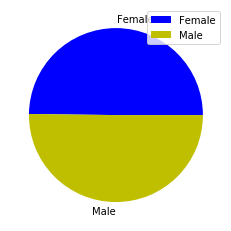

In [89]:
# Generate a pie plot showing the distribution 
# of female versus male mice using pyplot


# Calculate the unique number of users
total_unique = len(clean_df["Mouse_ID"].unique())

# Extract the username and gender column
obtain_colum = clean_df[["Mouse_ID", "Sex"]]

# dropping duplicate values for the username category. The parameter keep = "first" IS KEY HERE
drop_dup = clean_df.drop_duplicates(subset = ["Mouse_ID"], keep="first",inplace=False)

# Give a count per gender
count_gender = drop_dup.groupby(["Sex"]).count()

# Create a summary dataframe with a single column containing the results from the previous calculation
gender_summary = pd.DataFrame({"Count": count_gender ["Mouse_ID"]}, index = count_gender.index)
gender_summary

# Labels for the sections of the pie chart
labels = ["Female", "Male"]

# The Values of each section of the pie chart 
sizes = [124, 125]

# The colors of each section of the pie chart
colors = ['b', 'y']

# Create pie chart on above values
plt.pie(sizes, labels = labels, colors = colors)

plt.legend()

## Quartiles, Outliers and Boxplots

In [170]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

filt = clean_df["Timepoint"] == 45

vol_45 = clean_df[filt]
vol_45 

# Remove all other Drug_Regimens

#'Zoniferol', 'Stelasyn', 'Propriva', 'Naftisol', 'Ketapril'

vol_45.drop(vol_45.index[vol_45['Drug_Regimen'] == 'Placebo'], inplace = True)
vol_45.drop(vol_45.index[vol_45['Drug_Regimen'] == 'Zoniferol'], inplace = True)
vol_45.drop(vol_45.index[vol_45['Drug_Regimen'] == 'Stelasyn'], inplace = True)
vol_45.drop(vol_45.index[vol_45['Drug_Regimen'] == 'Propriva'], inplace = True)
vol_45.drop(vol_45.index[vol_45['Drug_Regimen'] == 'Naftisol'], inplace = True)
vol_45.drop(vol_45.index[vol_45['Drug_Regimen'] == 'Ketapril'], inplace = True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


#Extract only the two Columns needed
fnl_vol_45 = vol_45[["Drug_Regimen", "Tumor_Volume_mm3", "Mouse_ID", "Timepoint"]]
fnl_vol_45


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Drug_Regimen,Tumor_Volume_mm3,Mouse_ID,Timepoint
9,Ramicane,22.050126,k403,45
19,Capomulin,23.343598,s185,45
29,Capomulin,28.484033,x401,45
39,Capomulin,28.430964,m601,45
49,Ramicane,29.128472,g791,45
...,...,...,...,...
1797,Ceftamin,61.386660,x822,45
1813,Infubinol,67.685569,y163,45
1845,Ceftamin,68.594745,y769,45
1855,Ceftamin,64.729837,y865,45


In [171]:
# Locate the rows which contain mice on each drug and get the tumor volumes
Ramicane = fnl_vol_45.loc[fnl_vol_45.Drug_Regimen == "Ramicane"]
Ramicane.head()

,Drug_Regimen,Tumor_Volume_mm3,Mouse_ID,Timepoint
9,Ramicane,22.050126,k403,45
49,Ramicane,29.128472,g791,45
59,Ramicane,30.276232,s508,45
74,Ramicane,30.564625,m546,45
84,Ramicane,30.638696,z578,45


In [172]:
# Locate the rows which contain mice on each drug and get the tumor volumes
Capomulin = fnl_vol_45.loc[fnl_vol_45.Drug_Regimen == "Capomulin"]
Capomulin.head()

,Drug_Regimen,Tumor_Volume_mm3,Mouse_ID,Timepoint
19,Capomulin,23.343598,s185,45
29,Capomulin,28.484033,x401,45
39,Capomulin,28.430964,m601,45
104,Capomulin,31.023923,u364,45
124,Capomulin,31.896238,y793,45


In [173]:
# Locate the rows which contain mice on each drug and get the tumor volumes
Infubinol = fnl_vol_45.loc[fnl_vol_45.Drug_Regimen == "Infubinol"]
Infubinol.head()

,Drug_Regimen,Tumor_Volume_mm3,Mouse_ID,Timepoint
463,Infubinol,67.973419,a203,45
473,Infubinol,65.525743,a251,45
540,Infubinol,66.083066,a685,45
637,Infubinol,72.226731,c139,45
800,Infubinol,62.435404,e476,45


In [174]:
# Locate the rows which contain mice on each drug and get the tumor volumes
Ceftamin = fnl_vol_45.loc[fnl_vol_45.Drug_Regimen == "Ceftamin"]
Ceftamin.head()

,Drug_Regimen,Tumor_Volume_mm3,Mouse_ID,Timepoint
493,Ceftamin,62.999356,a275,45
993,Ceftamin,61.849023,j296,45
1033,Ceftamin,68.923185,k210,45
1112,Ceftamin,67.748662,l471,45
1132,Ceftamin,59.851956,l661,45


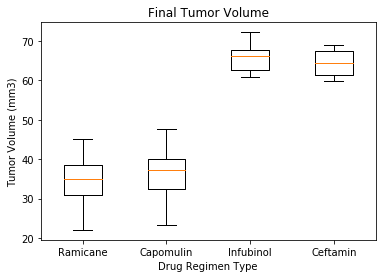

In [175]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
labels = ["Ramicane", "Capomulin", "Infubinol", "Ceftamin"]

plt.boxplot([Ramicane.Tumor_Volume_mm3, Capomulin.Tumor_Volume_mm3, Infubinol.Tumor_Volume_mm3, Ceftamin.Tumor_Volume_mm3], labels=labels)
plt.title('Final Tumor Volume')
plt.xlabel('Drug Regimen Type')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [176]:
fnl_vol_45.describe()   

,Tumor_Volume_mm3,Timepoint
count,63.000000,63.0
mean,45.803045,45.0
std,14.836926,0.0
min,22.050126,45.0
25%,33.480027,45.0
50%,40.159220,45.0
75%,62.142214,45.0
max,72.226731,45.0


In [128]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# IQR = Q3 - Q1

q1 = fnl_vol_45.Tumor_Volume_mm3.quantile(0.25)
q3 = fnl_vol_45.Tumor_Volume_mm3.quantile(0.75)
iqr = q3 - q1
print(iqr)

28.66218635


In [127]:
# Determine outliers using upper and lower bounds
# lower_limit = Q1 - 1.5 * IQR
# upper_limit = Q3 - 1.5 * IQR

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 - 1.5 * iqr

print(lower_limit)
print(upper_limit)

-9.513252184999999
19.148934165


## Line and Scatter Plots

In [135]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Filter to obtain single mouse data using Capomulin
s185 = clean_df.loc[clean_df.Mouse_ID == "s185"]


,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic_Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


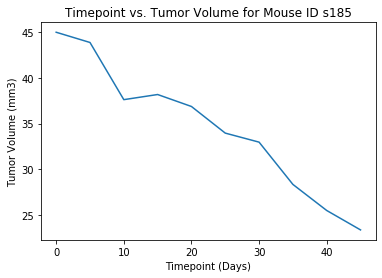

In [141]:
x = s185["Timepoint"]
y = s185["Tumor_Volume_mm3"]
plt.plot(x,y)
plt.title('Timepoint vs. Tumor Volume for Mouse ID s185')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [148]:
Capomulin = clean_df.loc[clean_df.Drug_Regimen == "Capomulin"]
Capomulin

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic_Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [149]:
# Get average of Tumor Volume 
avg_vol = Capomulin["Tumor_Volume_mm3"].mean()
avg_vol

40.67574114100001

<function matplotlib.pyplot.show(*args, **kw)>

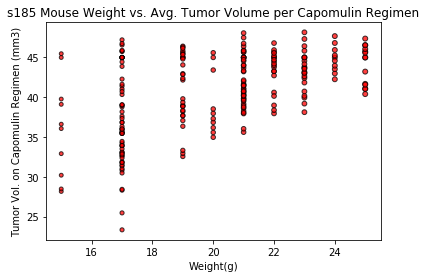

In [153]:
# Generate a scatter plot of mouse weight versus 
# average tumor volume for the Capomulin regimen
x = Capomulin["Weight_g"]
y = Capomulin["Tumor_Volume_mm3"]
plt.scatter(x,y, marker = 'o', facecolors = 'red', edgecolors = 'black', s = x, alpha = 0.75)
plt.title('s185 Mouse Weight vs. Avg. Tumor Volume per Capomulin Regimen')
plt.xlabel('Weight(g)')
plt.ylabel('Tumor Vol. on Capomulin Regimen (mm3)')
plt.show

## Correlation and Regression

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
